<a href="https://colab.research.google.com/github/necronet/Notebooks/blob/master/DSP/tNon_Periodic_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import thinkdsp

--2020-07-28 18:04:21--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2020-07-28 18:04:22--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48706 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.56K  --.-KB/s    in 0.03s   

2020-07-28 18:04:22 (1.86 MB/s) - ‘thinkdsp.py’ saved [48706/48706]



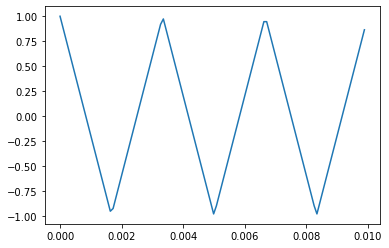

In [2]:
signal = thinkdsp.TriangleSignal(300)
signal.plot()

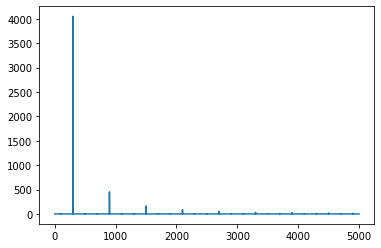

In [3]:
wave = signal.make_wave(duration = 1, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()

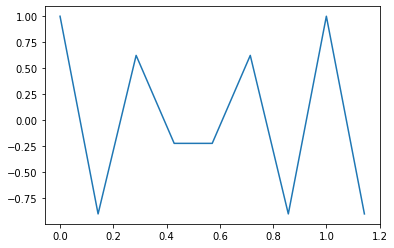

In [4]:
framerate = 7
signal = thinkdsp.CosSignal(4)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()

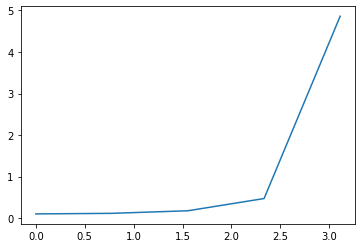

In [5]:
spectrum = segment.make_spectrum()
spectrum.plot()

In [55]:
signal = thinkdsp.Chirp(start=110, end=880)
wave = signal.make_wave(duration = 5)

In [58]:
wave.make_audio()

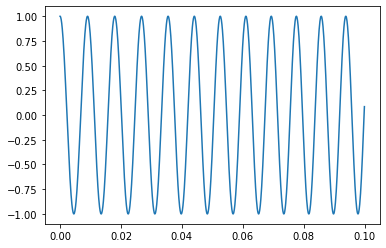

In [59]:
wave.segment(duration=0.1, start=0).plot()

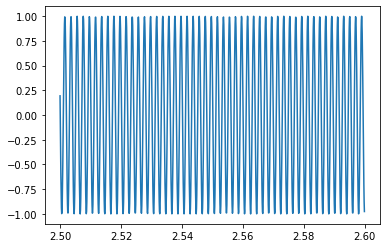

In [60]:
wave.segment(duration=0.1, start=2.5).plot()

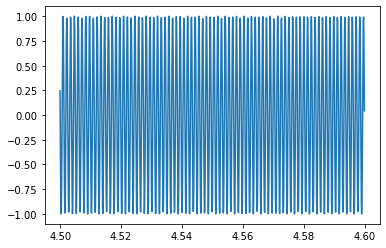

In [61]:
wave.segment(duration=0.1, start=4.5).plot()

In [63]:
class ExpoChirp(thinkdsp.Chirp):
  def evaluate(self, ts):
    start, end = np.log10(self.start), np.log10(self.end)
    freqs = np.logspace(start, end, len(ts)-1)
    return self._evaluate(ts, freqs)

In [96]:
expo_signal = thinkdsp.ExpoChirp(start=220, end=440)
expo_wave = signal.make_wave(duration=5, framerate=11025)

In [80]:
expo_wave.make_audio()

In [97]:
signal = thinkdsp.Chirp(start=220, end=440)
wave = signal.make_wave(duration=5, framerate = 11025)
spectrum = wave.make_spectrum()

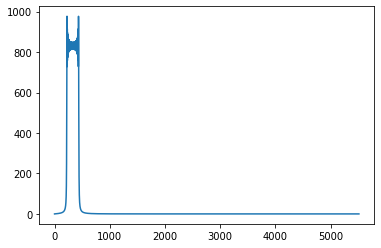

In [102]:
spectrum.plot()

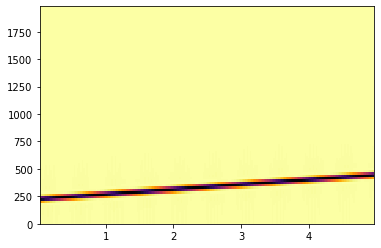

In [98]:
spectrogram = wave.make_spectrogram(seg_length = 512)
spectrogram.plot(high=2000)

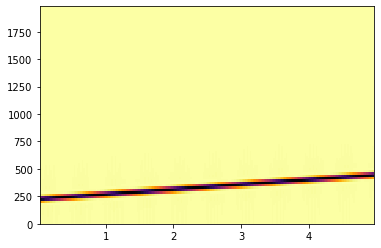

In [99]:
expo_spectrogram = expo_wave.make_spectrogram(seg_length = 512)
expo_spectrogram.plot(high = 2000)